# Laboratory exercise no. 2: Heat transfer simulation
## Katarzyna Wilk gr. 2

# Imports, classes and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from IPython.display import display, clear_output

This Python class represents a material used for thermal analysis. It contains attributes to store the name or identifier of the material, its density, specific heat capacity, and thermal conductivity. The init method initializes a new instance of the Material class with the specified properties.

In [2]:
class Material:
    """
    Represents a material with properties relevant for thermal analysis.

    Attributes:
        name (str): The name or identifier of the material.
        density (float): The density of the material in kg/m^3.
        spec_heat (float): The specific heat capacity of the material in J/(kg*K).
        thermal_cond (float): The thermal conductivity of the material in W/(m*K).

    Methods:
        __init__: Initializes a new Material instance with the specified properties.
    """
    def __init__(self, name, density, spec_heat, thermal_cond):
        self.name = name
        self.density = density
        self.spec_heat = spec_heat
        self.thermal_cond = thermal_cond

This class represents a metal plate used for thermal transfer simulation. It contains attributes to store various parameters of the plate, such as starting temperatures, dimensions, thickness, material, size of the square heater, and arrays defining the shape and starting temperature distribution of the plate. Additionally, it provides methods for initializing the plate, adding heater to the plate, filling the status table, and defining starting conditions for different scenarios.

In [3]:
class Plate:
    """
    Represents metal plate used for thermal transfer simulation
    
    Attributes:
        T1 (float): Starting temperature for middle area of plate (number 3 in status table) in Celcius
        T2 (float): Starting temperature for the edges of the plate (number 2 in status table) in Celcius
        A (float): Length of A egde, according to given scheme in meters
        B (float): Length of B egde, according to given scheme in meters
        C (float): Length of C egde, according to given scheme in meters
        thickness (float): Thickness of the metal plate in meters
        material (Material): Material of the plate, an instance of the Material class
        
        size (int): Size of the square table
        status_table (2d array): Array defining the shape of our plate (0 - outside of the plate, 1 - inside of the plate, 
            2 - edges of the plate, 3 - inside square)
        plate_table (2d array): Array defining the starting temperature of the plate
        
    Methods:
        __init__: Initializes a new Material instance with the specified properties.
        add_square: Helper method to the fill_table method. Adds the square in the middle of plate (number 3 in status table)
        fill_table: Fills the status table with values
        starting_condition1: Defines the starting condition for scenario 1
        starting_condition2: Defines the starting condition for scenario 2
    """
    def __init__ (self,T1, T2, A, B, C, thickness, material):
        self.T1 = T1
        self.T2 = T2
        self.A = A
        self.B = B
        self.C = C
        self.thickness = thickness
        self.material = material
        
        self.size = int(2*A*100+B*100)
        self.status_table = np.zeros((self.size,self.size))
        self.plate_table = np.zeros((self.size,self.size))
                    
    def add_square(self,table, size):
        if size >= len(table) or size >= len(table[0]):
            print("Error: Square size exceeds table dimensions")
            return None

        start_row = (len(table) - size) // 2
        start_col = (len(table[0]) - size) // 2

        for i in range(start_row, start_row + size):
            for j in range(start_col, start_col + size):
                table[i][j] = 3

        return table
    
    def fill_table(self):
        for i in range(self.size):
            for j in range(self.size):
                
                if i>= self.A*100 and i< self.A*100 *2:
                    if j == 0 or j == self.A *2*100 + self.B*100 - 1:
                        self.status_table[i][j] = 2
                    else:
                        self.status_table[i][j] = 1
                        
                    
                
                if j>= self.A*100 and j< self.A *2*100:
                    if i == 0 or i == self.A *2*100 + self.B*100 - 1:
                        self.status_table[i][j] = 2
                    else:
                        self.status_table[i][j] = 1
                        
                        
                if i == self.A*100 and (j <= self.A*100 or j >= self.A*2*100):
                    self.status_table[i][j] = 2
                    
                if i == self.A*100 * 2 - 1 and (j <= self.A*100 or j >= self.A*2*100-1):
                    self.status_table[i][j] = 2
                    
                if j == self.A*100 and (i <= self.A*100 or i >= self.A*2*100):
                    self.status_table[i][j] = 2
                
                if j == self.A*100 * 2 - 1 and (i <= self.A*100 or i >= self.A*2*100):
                    self.status_table[i][j] = 2
                    
               
                    
                self.add_square(self.status_table, int(self.C*100))
                
    def starting_condition1(self):
        for i in range(self.size):
            for j in range(self.size):
                if self.status_table[i][j] == 3:
                    self.plate_table[i][j] = self.T1
                elif self.status_table[i][j] == 2:
                    self.plate_table[i][j] = self.T2
                else:
                    self.plate_table[i][j] = 20
                    
    def starting_condition2(self):
        for i in range(self.size):
            for j in range(self.size):
                if self.status_table[i][j] == 3:
                    self.plate_table[i][j] = self.T1
                elif self.status_table[i][j] == 2:
                    self.plate_table[i][j] = self.T2
                else:
                    self.plate_table[i][j] = 20
                
    

## Boundary condition type 1

This Python function is used to simulate and display heat transfer in situation 1 for a given plate. It takes parameters such as the plate object, number of timesteps (Nt), length of one timestep (dt), spatial step sizes in the x and y directions (dx and dy), and a boolean flag to indicate whether to display the temperature plots. The function returns arrays containing the final temperature distribution and temperature values in every timestep.

The edges and the heater area stays on 10 and 80 degrees for whole simulation. The inside starts at 20 degrees and is updated every timetep.

In [4]:
def type1(plate, Nt = 100, dt = 0.1, dx = 0.01, dy = 0.01, display = True):
    """
    Function for showing heat transfer in situation 1.
    
    Parameters:
        plate (Plate): The plate for which we are checking heat propagation
        Nt (int): Number of timesteps. Default value: 100
        dt (foat): Length of one timestep. Default value: 0.1 s
        dx (float): Default value: 0.01 m 
        dy (float): Default value: 0.01 m 
        display (bool): Display the temperature plots?
        
    Returns:
        temp (2d array): Array with final temperature
        hist (3d array): Array with temperature values in every timestep
    """
    plate.starting_condition1()
    p = plate.material.density
    K = plate.material.thermal_cond
    cw = plate.material.spec_heat
    temp = plate.plate_table
    stat = plate.status_table
    size = plate.size

    hist = np.array(temp)
    
    if display:
        heatmap = plt.pcolor(temp)
        plt.colorbar(heatmap)
        plt.title("Starting condition")
        plt.imshow(temp)
        plt.show()
    
    for t in range(Nt):
        for i in range(size-1):
            for j in range(size-1):
                if stat[i][j] == 1:
                    temp[i, j] += (K * dt * (temp[i+1, j] + temp[i-1, j] - 2*temp[i, j]) / dx**2 + 
                                K * dt * (temp[i, j+1] + temp[i, j-1] - 2*temp[i, j]) / dy**2) / (p * cw)
                    
        
        hist = np.dstack((hist,temp))
    
    if not display:
        return temp,hist
    
    heatmap = plt.pcolor(temp)
    plt.colorbar(heatmap)
    plt.title("End result")
    plt.imshow(temp)
    plt.show()
    return temp,hist

## Boundary condition type 2

This Python function type2 is used for simulating heat transfer in situation 2. It takes parameters such as the plate object, number of timesteps (Nt), length of one timestep (dt), spatial step sizes in the x and y directions (dx and dy), power of the heater (power), and operation time of the heater (on_time). The function returns arrays containing the final temperature distribution and temperature values in every timestep. Additionally, it visualizes the starting and ending temperature distributions.

The whole plate starts at 20 degrees. For the first 10 seconds the heater is on. If the changes of temerature between frames are too big or too small we stop the simulation. The code may become unstable if we set Nt toi big.

In [5]:
def type2(t, Nt = 100, dt = 0.1, dx = 0.01, dy = 0.01, power = 100, on_time = 10):
    """
    Function for showing heat transfer in situation 2.
    
    Parameters:
        plate (Plate): The plate for which we are checking heat propagation
        Nt (int): Number of timesteps. Default value: 100
        dt (foat): Length of one timestep. Default value: 0.1 s
        dx (float): Default value: 0.01 m 
        dy (float): Default value: 0.01 m 
        power (int): Power of the heater. Default value: 100 W
        on_time (int): Operation time of the heater in seconds. Default value: 10 s
        
    Returns:
        temp (2d array): Array with final temperature
        hist (3d array): Array with temperature values in every timestep
    """
    t.starting_condition2()
    
    p = t.material.density
    K = t.material.thermal_cond
    cw = t.material.spec_heat
    temp = t.plate_table
    stat = t.status_table
    size = t.size
    C = t.C
    h = t.thickness

    hist = np.array(temp)
    
    heatmap = plt.pcolor(temp)
    plt.colorbar(heatmap)
    plt.title("Starting condition")
    plt.imshow(temp)
    plt.show()
    
    dT = (power*dt)/(cw * C*C * h *p)
    
    for t in range(Nt):
        for i in range(size-1):
            for j in range(size-1):
                if t*dt <= 10 and (stat[i,j] == 3):
                    temp[i, j] += dT
                #if t*dt <= 10 and( stat[i-1,j] == 3 or stat[i+1,j] == 3 or stat[i,j-1] == 3 or stat[i,j+1] ==3 or stat[i+1,j+1] == 3 or stat[i-1,j-1] == 3 or stat[i+1,j-1] == 3 or stat[i-1,j+1] == 3):
                #    temp[i, j] += dT
                if stat[i,j] != 0:
                    temp[i, j] += (K * dt * (temp[i+1, j] + temp[i-1, j] - 2*temp[i, j]) / dx**2 + 
                                K * dt * (temp[i, j+1] + temp[i, j-1] - 2*temp[i, j]) / dy**2) / (p * cw)
        hist = np.dstack((hist,temp))
        if t > 2:
            if abs(temp[30,30] - hist[30,30,-2]) >= 0.06 or abs(temp[30,30] - hist[30,30,-2]) <= 0.0001:
               print("Too unstable at step ", t)
               print(abs(temp[30,30] - hist[30,30,-2]))
               break
        
    
    
    heatmap = plt.pcolor(temp)
    plt.colorbar(heatmap)
    plt.title("End result")
    plt.imshow(temp)
    plt.show()
    
    return temp, hist

## Helper function

This function showHistory is used to display the history of a simulation, showing every timestep of heat transfer in animation. It takes the history array, which contains 2D arrays of heat values for every timestep, and the pause parameter specifies how long each frame should be displayed.

In [6]:
def showHistory(history, pause = 0.01):
    """
    Function for showing history of the simulation. Displays every timestep of heat transfer.
    
    Parameters:
        history (3d array): 3d array containing 2d arrays of heat values for every timestep
        pause (float): how long should the frame be displayed. Default value: 0.01 s
    """
    for i in range(history.shape[2]):  
        plt.imshow(history[:, :, i], cmap='viridis') 
        plt.title(f'Timestep {i+1}')
        plt.colorbar()
        plt.show()
        clear_output(wait = True)
        plt.pause(pause)

Defining materials (alumina, copper and stainless steel) as per instructions using the Material class.

In [7]:
alumina = Material("alumina", 2700, 900, 237)
copper = Material("copper", 8920, 380, 401)
stainless_steel = Material("stainless_steel", 7860, 450, 58)

# Calculation of the time evolution of temperature distribution in a metal plate made of selected material for specified initial condition and boundary condition of type 1

Testing scenario 1 with copper \
Here we are testing the scenario 1 type simulation with our chosen material - copper. We set the heater temperature to 80, the edges to 10 and set the dimetions of the plate. Then we fill the table with starting data and run the simulation for 100 seconds (Nt = 1000, dt = 0.1)

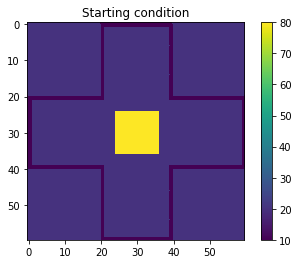

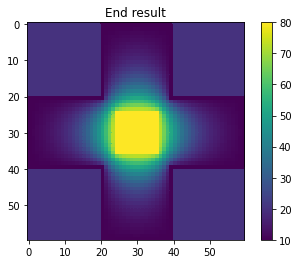

In [8]:
t1 = Plate(80,10,0.2,0.2,0.12,0.004,copper)
t1.fill_table()
tt1,h1 = type1(t1, Nt = 1000)

As we can see the temerature spread from the heater area and along the edges. 

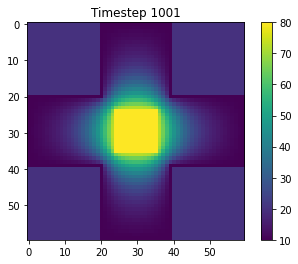

In [9]:
showHistory(h1)

# The calculation of temporal evolution of spatial temperature distribution and final temperature (simulation is running until steady state condition (to be defined by a student), while the heater is switched off after 10s of the simulation) in the plate for defined initial condition and the 2-nd boundary condition for alumina and cooper (comparison of the results obtained for two metals).

First we start testing our type 2 simutation with copper and display results. We set the whole table to 20 degrees and run the simulation. The heater is turned on for the first 10 seconds, and the whole simulation lasts 100 seconds.

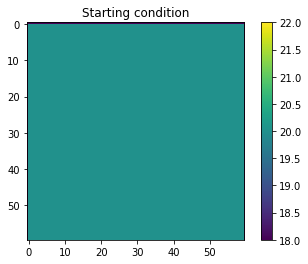

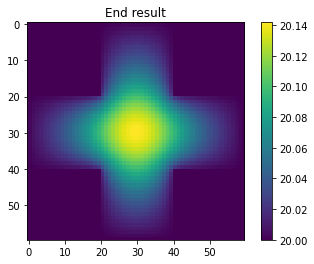

In [10]:
t2 = Plate(20,20,0.2,0.2,0.12,0.004,copper)
t2.fill_table()
tt, h2 = type2(t2, Nt = 1000, dt=0.1)

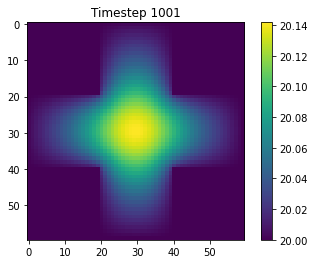

In [11]:
showHistory(h2)

As we saw in animation the temperature was rising quickly in the heater area for the first 10 seconds. Then it started going down, fast in the beginning, slower over time, till it starded to look like it was leveling at some point.

Testing scenario 2 with alumina with the same starting conditions as copper

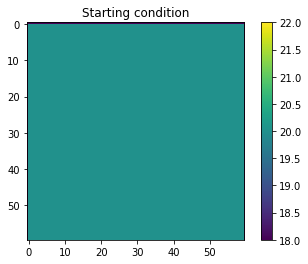

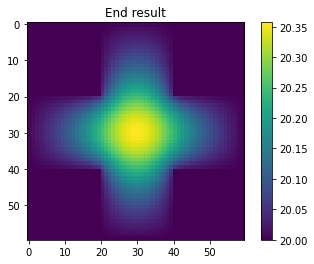

In [12]:
t3 = Plate(20,20,0.2,0.2,0.12,0.004,alumina)
t3.fill_table()
tt, h3 = type2(t3, Nt = 1000,dt=0.1)

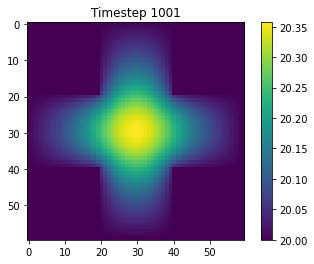

In [13]:
showHistory(h3)

Just like with copper, the same thing happend. The temperature was rising quickly in the heater area for the first 10 seconds, then it started going down, fast in the beginning, slower over time.

I decided to see what will the simulaton look like for steel with the same starting conditions as above.

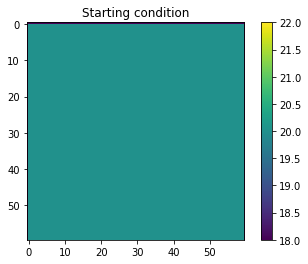

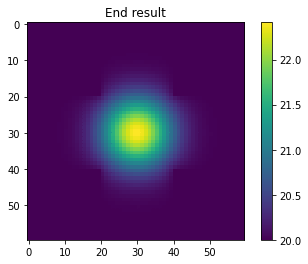

In [14]:
t4 = Plate(20,20,0.2,0.2,0.12,0.004,stainless_steel)
t4.fill_table()
tt, h4 = type2(t4, Nt = 1000,dt=0.1)

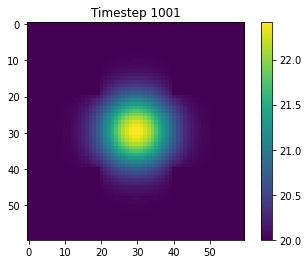

In [15]:
showHistory(h4)

It looks like the temperature went up in the heater area, but it didn't transfer very well. Most propably because steel has very low thermal thermal conductivity comparing to other two materials.

The plots below show difference in temperature in the middle of the plates over the simulation

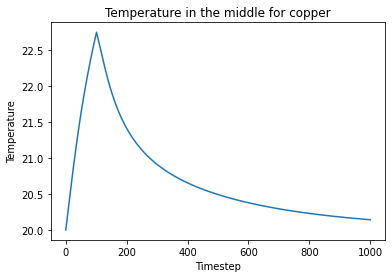

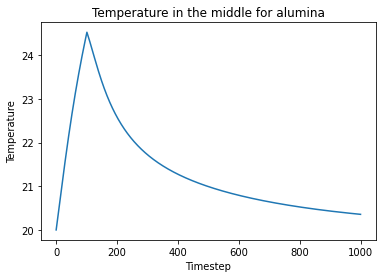

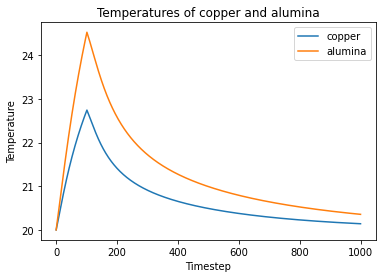

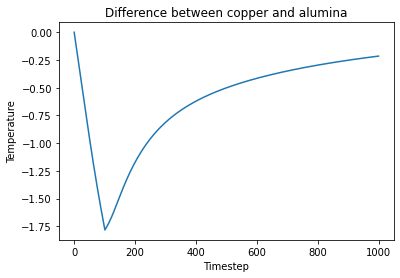

In [16]:
# difference in temperature in the middle of plate between copper and allumina
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.title("Temperature in the middle for copper")
plt.plot(h2[30,30,:])
plt.show()
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.title("Temperature in the middle for alumina")
plt.plot(h3[30,30,:])
plt.show()
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.title("Temperatures of copper and alumina")
plt.plot(h2[30,30,:], label = "copper") 
plt.plot(h3[30,30,:], label = "alumina") 
plt.legend() 
plt.show()
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.title("Difference between copper and alumina")
plt.plot(h2[30,30,:]-h3[30,30,:])
plt.show()


The simulation starts with rapid growth of temperature for copper and alumina. We can also notice the heat spreading to neighbouring nodes. When the heater is switched off, more heat is geting redistributed and the temperature starts to level itself. Alumina reached higher temperatures in our experiment

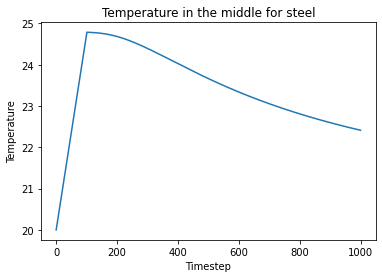

In [17]:
plt.xlabel('Timestep')
plt.ylabel('Temperature')
plt.title("Temperature in the middle for steel")
plt.plot(h4[30,30,:])
plt.show()

The plot above shows the temperature changes for steel. It went up quickly, but it was very slow to transfer. This plot looks complety different from copper and alumina plots.

# Difference between theory and simulation

To see if my simulation is correct I calculate the difference between theoretical and simulation results. For theory and simulation I pick the themperature in the middle of the heater, 10 seconds after the simulation started

### Copper

In [18]:
theory = (100 * 10)/ (copper.spec_heat * 0.12**2 * 0.004 * copper.density)

simulation = np.max(h2[30,30,:]) - 20

print("Diffecence for copper: ", abs(simulation - theory))

Diffecence for copper:  2.3794292729551723


### Alumina

In [19]:
theory = (100 * 10)/ (alumina.spec_heat * 0.12**2 * 0.004 * alumina.density)

simulation = np.max(h3[30,30,:]) - 20

print("Diffecence for alumina: ", abs(simulation - theory))

Diffecence for alumina:  2.620009520937381


### Steel

In [20]:
theory = (100 * 10)/ (stainless_steel.spec_heat * 0.12**2 * 0.004 * stainless_steel.density)

simulation = np.max(h4[30,30,:]) - 20

print("Diffecence for stainless steel: ", abs(simulation - theory))

Diffecence for stainless steel:  0.1237030558456711


The difference between theory and simulation is quite big for copper and alumina, but our theoretical calculations didn't include heat thansfer between nodes. For steel the difference is small, but heat in steel moves very slowly so there is very little heat thansfer between neighbouring points.

# Testing of the numerical stability for different values of time steps and spatial resolution.

Testing stability for different dt in scenario 1 with stainless steel for 50 seconds to see how much does the dt value matters.

In [29]:
steel = Plate(80,10,0.2,0.2,0.12,0.004,stainless_steel)
steel.fill_table()
dt_table = [0.01,0.05, 0.1,0.5, 1]
#st = np.zeros(steel.status_table.shape)
sh = np.zeros(steel.status_table.shape)

In [30]:
st = np.zeros(steel.status_table.shape)
for t in dt_table:
    print(t)
    x,y = type1(steel, dt = t, display = False, Nt = int(50/t))
    st =  np.dstack((st,x))
    #sh =  np.dstack((sh,y))

0.01
0.05
0.1
0.5
1


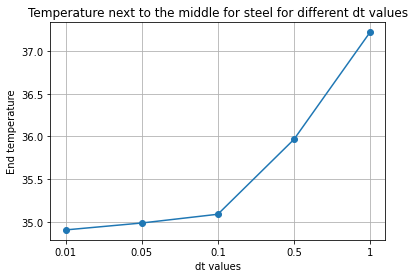

In [31]:
x_positions = range(len(dt_table))

plt.plot(x_positions, st[22,22,1:], marker='o')

plt.xticks(x_positions, dt_table)

plt.xlabel('dt values')
plt.ylabel('End temperature')
plt.title("Temperature next to the middle for steel for different dt values")

plt.grid(True)
plt.show()

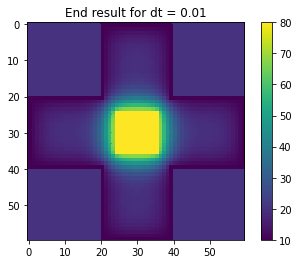

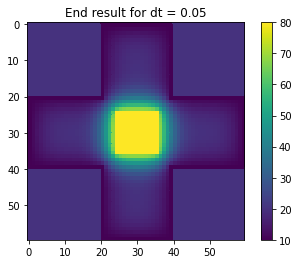

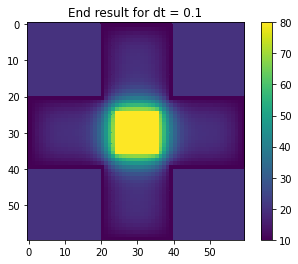

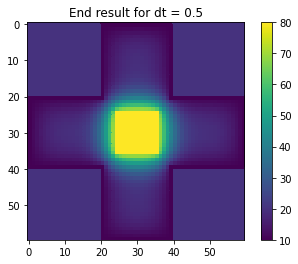

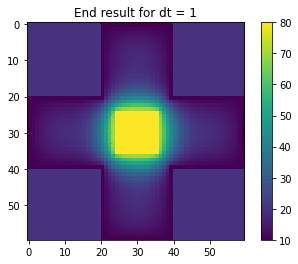

In [32]:
for i in range(1,6):
    heatmap = plt.pcolor(st[:,:,i])
    plt.colorbar(heatmap)
    plt.title("End result for dt = " + str(dt_table[i-1]))
    plt.imshow(st[:,:,i])
    plt.show()

You can't really see the difference on the images, but the tempereture on the plot above varies by more than 2 degrees, which seems like a lot to me. The dt value I use in the rest of this lab (dt = 0.1) is the last before the big jump in values.

Testing stability for different dx and dy in scenario 1 with stainless steel for 100 seconds

In [33]:
steel = Plate(80,10,0.2,0.2,0.12,0.004,stainless_steel)
steel.fill_table()
dx_table = [0.005,0.01,0.05, 0.1,0.5, 1]
dy_table = [0.005,0.01,0.05, 0.1,0.5, 1]
#st = np.zeros(steel.status_table.shape)
sh = np.zeros(steel.status_table.shape)

In [34]:
st = np.zeros(steel.status_table.shape)
for x,y in zip(dx_table,dy_table):
    print(x,y)
    x,y = type1(steel, display = False, dx = x, dy = y)
    st =  np.dstack((st,x))
    #sh =  np.dstack((sh,y))

0.005 0.005
0.01 0.01
0.05 0.05
0.1 0.1
0.5 0.5
1 1


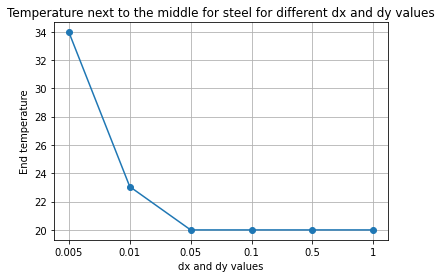

In [35]:
x_positions = range(len(dx_table))

plt.plot(x_positions, st[22,22,1:], marker='o')

plt.xticks(x_positions, dx_table)

plt.xlabel('dx and dy values')
plt.ylabel('End temperature')
plt.title("Temperature next to the middle for steel for different dx and dy values")

plt.grid(True)
plt.show()

If the values of dx, dy or dt are badly picked, the end results may be very different from our expectations. 

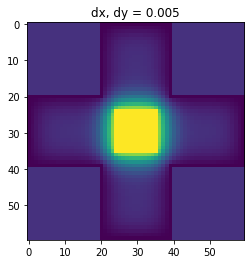

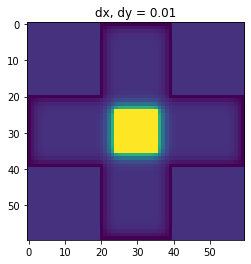

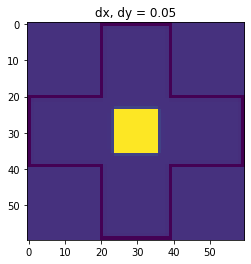

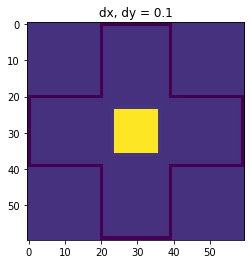

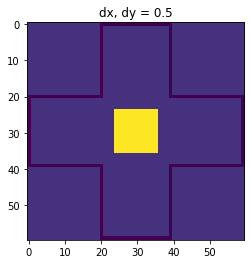

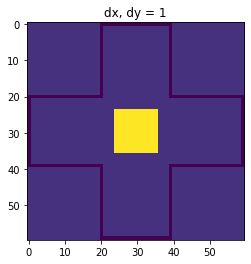

In [36]:
for i in range(1,7):
    plt.title("dx, dy = " + str(dx_table[i-1]))
    plt.imshow(st[:,:,i])
    plt.show()

This time you can clearly see the difference between the images. It looks like if we pick too big dx and dy, there will be no changes ar the changes will be unnoticeable.